<a href="https://colab.research.google.com/github/muhammadsajad/100_Days_of_Deep_Learning/blob/main/Graduate_Admission_Prediction_Using_Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import sklearn
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
!mkdir -p /root/.kaggle

In [4]:
!cp kaggle_api.json /root/.kaggle/

In [5]:
!kaggle datasets download -d mohansacharya/graduate-admissions

Dataset URL: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
License(s): CC0-1.0
  0% 0.00/9.64k [00:00<?, ?B/s]
100% 9.64k/9.64k [00:00<00:00, 21.5MB/s]


In [6]:
!unzip \*.zip && rm *.zip

Archive:  graduate-admissions.zip
  inflating: Admission_Predict.csv   
  inflating: Admission_Predict_Ver1.1.csv  


In [7]:
# We will read and used the second one beacuse its updated data
df=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.shape

(500, 9)

In [11]:
# Check any missing value is present or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [13]:
# Check any duplicated row is prosent or not
df.duplicated().sum()

0

In [14]:
# We have to remove a serial column from our dataset because its have no role in our prediction
df.drop(columns=['Serial No.'],inplace=True)

In [15]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
# Now we have to extract Data and their labels for training data and test data
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [17]:
X.shape

(500, 7)

In [22]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [23]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [24]:
# Now spliting the data in training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [25]:
X_train.shape

(400, 7)

In [26]:
X_test.shape

(100, 7)

In [28]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1


In [29]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
304,313,106,2,2.5,2.0,8.43,0
340,312,107,3,3.0,3.0,8.46,1
47,339,119,5,4.5,4.0,9.70,0
67,316,107,2,3.5,3.5,8.64,1
479,325,110,4,4.5,4.0,8.96,1


In [31]:
# Now we have to scale the values in dataset in order to converge fast and generalize well
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [32]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [42]:
# We are deffinig here our model architecture and keeping for output the activation function is linear because its a regression problem
model=Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))



In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(loss='mean_squared_error',optimizer="Adam")

In [45]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 1.3347 - val_loss: 1.3128
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 1.0747 - val_loss: 1.0659
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.8714 - val_loss: 0.8723
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7167 - val_loss: 0.7215
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6006 - val_loss: 0.6142
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5251 - val_loss: 0.5475
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4843 - val_loss: 0.5120
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4585 - val_loss: 0.4887
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4390 - val_loss: 0.4682
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4207 - val_loss: 0.4493
Epoch 11

In [46]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7238946771486298

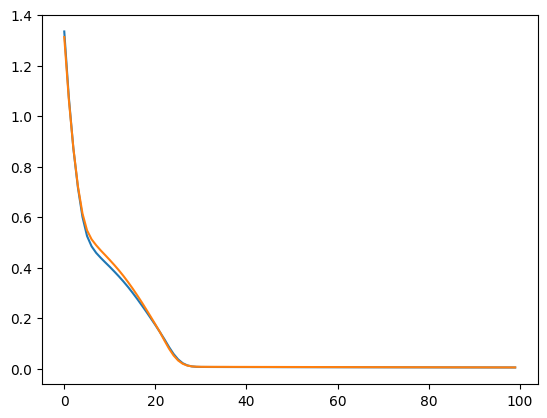

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])